In [1]:
from eis.vcf_dataloader import SplicingVCFDataloader
from eis import Eis, predict_all_table

from eis.utils import max_varEff

Using TensorFlow backend.


In [2]:
gtf = '../tests/data/test.gtf'
vcf = '../tests/data/test.vcf.gz'
fasta = '../tests/data/hg19.nochr.chr17.fa'
gtfIntervalTree = '../tests/data/test.pkl' # pickle exon interval Tree

In [3]:
dl = SplicingVCFDataloader(gtfIntervalTree, 
                          fasta,
                          vcf,
                          out_file=gtfIntervalTree,
                          split_seq=False, overhang=(50,10))

In [4]:
next(dl)

{'inputs': {'seq': 'TCCAGGAGAATGAATTGACACTAATCTCTGCTTGTGTTCTCTGTCTCCAGCAATTGGGCAGATGTGTGAGGCACCTGTGGTGACCCGAGAGTGGGTGTTGGACAGTGTAGCACTCTACCAGTGCCAGGAGCTGGACACCTACCTGATACCCCAGATCCCCCACAGCCACTACTGACTGCAGCCAGCCACAGGTACAGAGCCACAGGACCCCAAGAATGAGCTTACAAAGTGGCCTTTCCAGGCCCTGGGAGCTCCTCTCACTCTTCAGTCCTTCTACTGTCCTGGCTACTAAATATTTTATGTACATCAGCCTGAAAAGGACTTCTGGCTATGCAAGGGTCCCTTAAAGATTTTCTGCTTGAAGTCTCCCTTGGAAATCTGCCATGAGCACAAAATTATGGTAATTTTTCACCTGAGAAGATTTTAAAACCATTTAAACGCCACCAATTGAGCAAGATGCTGATTCATTATTTATCAGCCCTATTCTTTCTATTCAGGCTGTTGTTGGCTTAGGGCTGGAAGCACAGAGTGGCTTGGCCTCAAGAGAATAGCTGGTTTCCCTAAGTTTACTTCTCTAAAACCCTGTGTTCACAAAGGCAGAGAGTCAGACCCTTCAATGGAAGGAGAGTGCTTGGGATCGATTATGTGACTTAAAGTCAGAATAGTCCTTGGGCAGTTCTCAAATGTTGGAGTGGAACATTGGGGAGGAAATTCTGAGGCAGGTATTAGAAATGAAAAGGAAACTTGAAACCTGGGCATGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTGGGCAGATCACTGGAGGTCAGGAGTTCGAAACCAGCCTGGCCAACATGGTGAAACCCCATCTCTACTAAAAATACAGAAATTAGCCGGTCATGGTGGTGGACACCTGTAATCCCAGCTACTCAGGTGGCTAAGGCAGGAGAATCACTTCAGCCCGGGAGGTGGAGGTTGCAGTGAGCC

In [5]:
model = Eis(
    exon_cut_l=0,
    exon_cut_r=0,
    acceptor_intron_cut=6,
    donor_intron_cut=6,
    acceptor_intron_len=50,
    acceptor_exon_len=3,
    donor_exon_len=5,
    donor_intron_len=13)

/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [6]:
predictions = predict_all_table(model, dl, batch_size=1024, split_seq=False, assembly=True)

0it [00:00, ?it/s]/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/eis-0.2.0-py3.6.egg/eis/eis.py:150: UserWarning: None GT donor
  warnings.warn("None GT donor", UserWarning)
/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/eis-0.2.0-py3.6.egg/eis/eis.py:152: UserWarning: None AG donor
  warnings.warn("None AG donor", UserWarning)
2it [00:19,  9.90s/it]


In [7]:
predictions.head(10)

,ID,exons,EIS_diff
0,17:41197805:ACATCTGCC:['A'],17_41196313_41197819:-,0.003618
1,17:41197805:ACATCTGCC:['A'],17_41196312_41197819:-,0.003615
2,17:41197805:ACATCTGCC:['A'],17_41197580_41197819:-,0.046849
3,17:41197805:ACATCTGCC:['A'],17_41197646_41197819:-,0.050523
4,17:41197805:ACATCTGCC:['A'],17_41197695_41197819:-,0.042311
5,17:41197809:CTGCCCAAT:['C'],17_41196822_41197819:-,-0.200707
6,17:41197809:CTGCCCAAT:['C'],17_41196313_41197819:-,-0.207593
7,17:41197809:CTGCCCAAT:['C'],17_41196312_41197819:-,-0.207601
8,17:41197809:CTGCCCAAT:['C'],17_41197580_41197819:-,-0.137880
9,17:41197809:CTGCCCAAT:['C'],17_41197646_41197819:-,-0.114219


In [8]:
predictionsMax = max_varEff(predictions)

In [9]:
predictionsMax.head()

,ID,EIS_diff,exons
0,17:41197805:ACATCTGCC:['A'],0.050523,17_41197646_41197819:-
1,17:41197809:CTGCCCAAT:['C'],-0.207601,17_41196312_41197819:-
2,17:41197810:T:['A'],0.101059,17_41197695_41197819:-
3,17:41197811:G:['T'],0.328513,17_41197695_41197819:-
4,17:41197812:C:['A'],0.052036,17_41197695_41197819:-


In [10]:
import matplotlib.pyplot as plt 

In [11]:
%matplotlib inline

(array([  1.,   3.,  17.,  49., 119., 175., 531., 113.,  10.,   2.]),
 array([-10.72896106,  -9.14416446,  -7.55936787,  -5.97457128,
         -4.38977469,  -2.80497809,  -1.2201815 ,   0.36461509,
          1.94941168,   3.53420828,   5.11900487]),
 <a list of 10 Patch objects>)

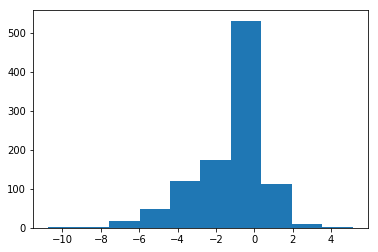

In [12]:
plt.hist(predictionsMax.EIS_diff)

In [13]:
predictionsMax.sort_values(['EIS_diff']).head()

,ID,EIS_diff,exons
691,17:41245766:CATATTGCTTATACTGCTGCTTATAGGTTCAGCT...,-10.728961,17_41245603_41246877:-
104,17:41201134:TTAC:['T'],-8.857750,17_41201138_41201211:-
159,17:41203079:CCT:['ATGTTG'],-7.963199,17_41203080_41203134:-
511,17:41226345:TACCTAGATCTTGCCTTGGCAAGTAAGATGTTTC...,-7.602323,17_41226348_41226538:-
248,17:41215348:AC:['A'],-7.406505,17_41215350_41215390:-


## Predict pathogenicity

In [14]:
dl = SplicingVCFDataloader(gtfIntervalTree, 
                          fasta,
                          vcf,
                          out_file=gtfIntervalTree,
                          split_seq=False, overhang=(50,10))

In [6]:
predictions = predict_all_table(model, dl, batch_size=1024, split_seq=False, assembly=True, pathogenicity=True)

0it [00:00, ?it/s]/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/eis-0.2.0-py3.6.egg/eis/eis.py:150: UserWarning: None GT donor
  warnings.warn("None GT donor", UserWarning)
/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/eis-0.2.0-py3.6.egg/eis/eis.py:152: UserWarning: None AG donor
  warnings.warn("None AG donor", UserWarning)
2it [00:19,  9.94s/it]


In [7]:
predictions.head()

,ID,exons,EIS_diff
0,17:41197805:ACATCTGCC:['A'],17_41196313_41197819:-,0.053529
1,17:41197805:ACATCTGCC:['A'],17_41196312_41197819:-,0.095806
2,17:41197805:ACATCTGCC:['A'],17_41197580_41197819:-,0.051230
3,17:41197805:ACATCTGCC:['A'],17_41197646_41197819:-,0.067922
4,17:41197805:ACATCTGCC:['A'],17_41197695_41197819:-,0.104793


In [8]:
predictionsMax = max_varEff(predictions)

In [11]:
predictionsMax.sort_values('EIS_diff', ascending=False).head()

,ID,EIS_diff,exons
44,17:41199722:TGGATCCCCA:['T'],0.999999,17_41199660_41199720:-
312,17:41215986:C:['T'],0.999874,17_41215891_41215968:-
916,17:41267742:CTTGCAAAATATGTGGTCACACTTTGTGGAGACA...,0.999784,17_41267743_41267796:-
524,17:41242956:T:['C'],0.999770,17_41242961_41243049:-
268,17:41215890:CAGAAATAGCTAACTACCCATTTTCCTCCCGCAA...,0.999756,17_41215891_41215968:-


In [1]:
import pandas as pd

In [23]:
df = pd.read_table(vcf, comment='#', header=None)
df.columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO']

In [99]:
df['INFO'][0].split(';')

['ALLELEID=180816',
 'CLNDISDB=MedGen:C0027672,SNOMED_CT:699346009|MedGen:C2676676,OMIM:604370|MedGen:CN517202',
 'CLNDN=Hereditary_cancer-predisposing_syndrome|Breast-ovarian_cancer,_familial_1|not_provided',
 'CLNHGVS=NC_000017.10:g.41197806_41197813delCATCTGCC',
 'CLNREVSTAT=reviewed_by_expert_panel',
 'CLNSIG=Pathogenic',
 'CLNVC=Deletion',
 'CLNVCSO=SO:0000159',
 'GENEINFO=BRCA1:672',
 'MC=SO:0001589|frameshift_variant',
 'ORIGIN=1',
 'RS=730881441']

In [98]:
def get_clinsig(info):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-98-1cee99f03992>, line 2)